In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)

(60000, 28, 28)


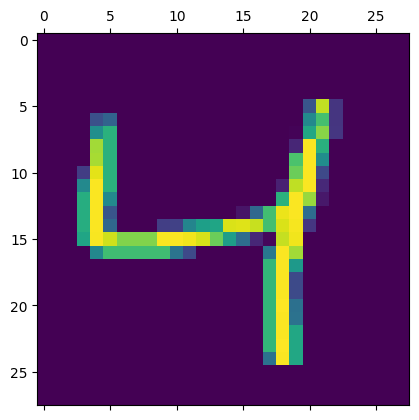

In [ ]:
plt.matshow(x_train[2])

In [ ]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [ ]:
y_train[2]

np.uint8(4)

converting the 2d image to 1d as we need to feed it into the neural network

In [ ]:
x_train.shape  #so i want 60000 images but in 1d so i reshape it to 28*28=784

(60000, 28, 28)

In [ ]:
#dont execute this now but do it after you have created a simple neural network
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train_flattern=x_train.reshape(len(x_train),784)
x_test_flattern=x_test.reshape(len(x_test),784)

Now creating a very simple neural network (just an input layer then a output layer)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flattern,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8142 - loss: 0.7222
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9122 - loss: 0.3156
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9225 - loss: 0.2780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9223 - loss: 0.2728
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9253 - loss: 0.2683


as its not a great accuracy we try to scale the values by diving it by 255
(the first time when we ran it without scaling the accuracy was a bit smaller but after scaling as you can see now the accuracy is more)

In [ ]:
model.evaluate(x_test_flattern,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9137 - loss: 0.3044


[0.26830777525901794, 0.925599992275238]

In [ ]:
model.predict(x_test_flattern)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[2.9978761e-02, 2.2287763e-07, 8.0902800e-02, ..., 9.9975139e-01,
        6.5476947e-02, 6.3485199e-01],
       [5.3560662e-01, 1.0216327e-02, 9.9974608e-01, ..., 1.2201203e-12,
        2.2220032e-01, 3.5770322e-09],
       [5.1525712e-04, 9.9119633e-01, 7.2289890e-01, ..., 1.6733842e-01,
        3.8209793e-01, 5.0076272e-02],
       ...,
       [4.8464049e-06, 2.9601356e-06, 1.7589801e-03, ..., 2.3554406e-01,
        5.0662833e-01, 7.7790254e-01],
       [1.9131231e-04, 1.8778288e-04, 2.1021072e-04, ..., 2.6232492e-05,
        6.6559064e-01, 1.0723816e-04],
       [1.6516892e-02, 3.7139938e-10, 4.3198538e-01, ..., 2.0532717e-08,
        2.5815578e-04, 1.1832951e-06]], dtype=float32)

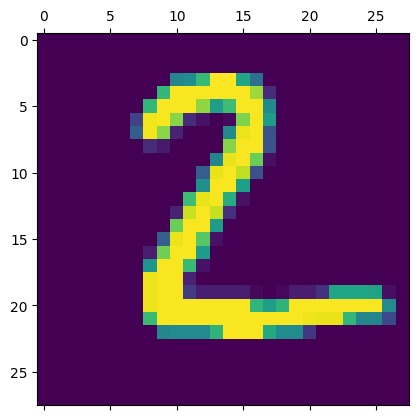

In [ ]:
plt.matshow(x_test[1])

In [ ]:
y_predict=model.predict(x_test_flattern)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_predict[0]

array([2.9978761e-02, 2.2287763e-07, 8.0902800e-02, 9.5088232e-01,
       2.2025707e-03, 9.8584592e-02, 1.2253383e-06, 9.9975139e-01,
       6.5476947e-02, 6.3485199e-01], dtype=float32)

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
np.argmax(y_predict[1])

np.int64(2)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    6,    4,    2,    1,    0],
       [   0, 1107,    5,    2,    0,    1,    4,    2,   14,    0],
       [   5,    6,  943,   14,    8,    1,   10,    8,   33,    4],
       [   3,    0,   25,  926,    0,   16,    2,    9,   22,    7],
       [   2,    1,    9,    2,  911,    0,    6,    3,   10,   38],
       [  10,    1,    9,   47,   11,  759,   10,    5,   33,    7],
       [  13,    3,   13,    1,    8,   11,  905,    2,    2,    0],
       [   1,    5,   27,    7,    9,    0,    0,  942,    2,   35],
       [   7,    7,    9,   24,    8,   20,    8,   12,  872,    7],
       [  10,    7,    2,   10,   25,    7,    0,   16,    5,  927]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

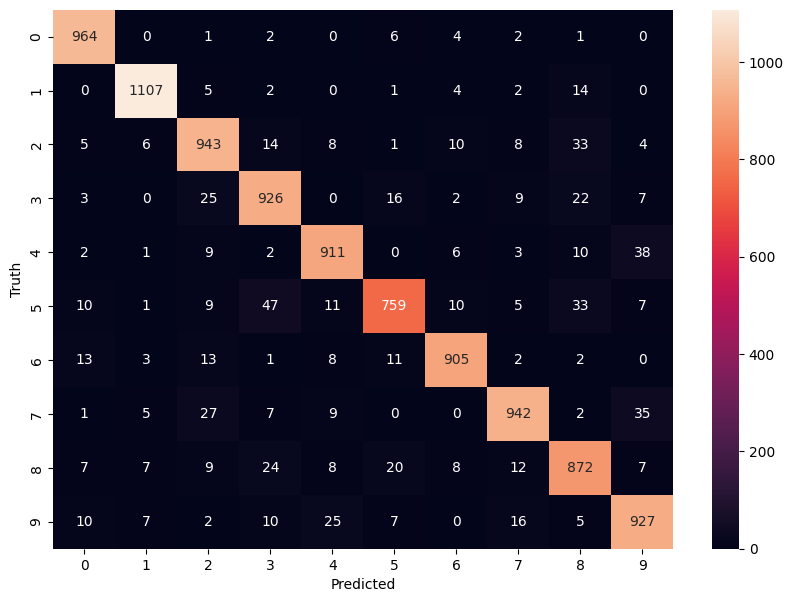

In [ ]:
import seaborn as  sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

adding hidden layers to improve the performance

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flattern,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8666 - loss: 0.4711
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9618 - loss: 0.1325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9732 - loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9804 - loss: 0.0637
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0485


In [ ]:
model.evaluate(x_test_flattern,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9715 - loss: 0.0902


[0.07888644188642502, 0.9746000170707703]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

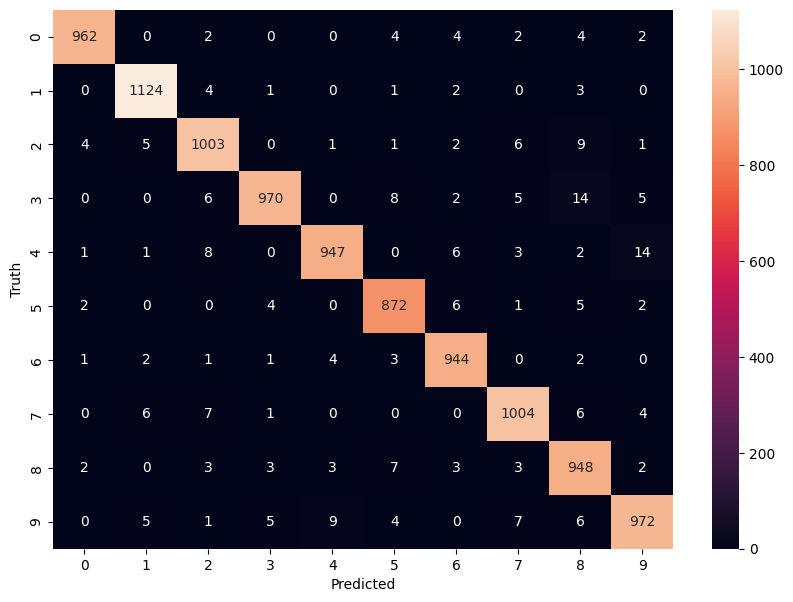

In [ ]:
y_predict=model.predict(x_test_flattern)
y_predicted_labels=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as  sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#if you dont want to flattern it manually keras does it for you

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8666 - loss: 0.4662
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9593 - loss: 0.1384
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9730 - loss: 0.0889
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9818 - loss: 0.0630
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9856 - loss: 0.0482
